In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # 한 실행칸에 프린트 여러개 해도 다 출력시키도록 하는 코드.
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
pd.set_option('display.max_rows', 500)
from datetime import datetime
import scipy as sp
import scipy.stats
from scipy.optimize import minimize, minimize_scalar

# 1번

In [2]:
data = pd.read_excel('./tips.xlsx')
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [3]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## (1)

In [4]:
data['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [5]:
data_1 = data.copy()
data_1['ratiocount'] = data_1['tip']/data_1['total_bill']
data_1['ratiocount'].mean()
data_12 = data_1[['sex', 'ratiocount']]

0.16080258172250478

In [6]:
data13 = data_12.groupby('sex').count()
data14 = data_12.groupby('sex')['ratiocount'].mean()
data13['mean'] = data14
data13

,ratiocount,mean
sex,,
Female,87,0.166491
Male,157,0.157651


## (2)

In [7]:
data2 = data.copy()

In [8]:
data2_dinner = data2[data2['time'] == 'Dinner']
data2_Lunch = data2[data2['time'] == 'Lunch']
Overall = data2['size'].corr(data2['total_bill'])
Dinner = data2_dinner['size'].corr(data2_dinner['total_bill'])
Lunch = data2_Lunch['size'].corr(data2_Lunch['total_bill'])
print('Overall = {}\nDinner = {}\nLunch = {}'.format(Overall, Dinner, Lunch))

Overall = 0.5983151309049022
Dinner = 0.557015029834968
Lunch = 0.7086620012734179


## (3)

In [9]:
data3 = data.copy()

In [10]:
sorted_data = data3.sort_values('total_bill')
min_data = sorted_data[0:20]
max_data = sorted_data[-20:].sort_values('total_bill', ascending = False)
min_data
max_data

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2
195,7.56,1.44,Male,No,Thur,Lunch,2
218,7.74,1.44,Male,Yes,Sat,Dinner,2
145,8.35,1.50,Female,No,Thur,Lunch,2
135,8.51,1.25,Female,No,Thur,Lunch,2
126,8.52,1.48,Male,No,Thur,Lunch,2


,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3
102,44.30,2.50,Female,Yes,Sat,Dinner,3
197,43.11,5.00,Female,Yes,Thur,Lunch,4
142,41.19,5.00,Male,No,Thur,Lunch,5
184,40.55,3.00,Male,Yes,Sun,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4


In [11]:
Bottom20 = len(min_data[min_data['smoker'] == 'Yes'])/len(min_data)
Top20 = len(max_data[max_data['smoker'] == 'Yes'])/len(max_data)
print('Bottom 20 = {}'.format(Bottom20))
print('Top 20 = {}'.format(Top20))

Bottom 20 = 0.35
Top 20 = 0.5


## (4)

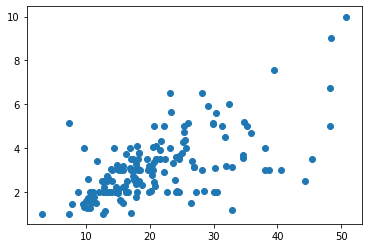

In [12]:
data4 = data.copy()
x = data4[data4['day'] == 'Sun']
y = data4[data4['day'] == 'Sat']
total = pd.concat([x, y])
plt.scatter(total['total_bill'], total['tip'])

# 2번

## (1) 최적화

In [16]:
def func(z):
    rv = sp.stats.norm(loc = 0, scale = 1)
    res = abs(rv.cdf(z)-0.2)
    return res

In [17]:
optimum = minimize_scalar(func)
print('z-value = ', optimum.x)

z-value =  -0.8416212408040447


## (2) monte carlo simulation

In [54]:
rv = sp.stats.norm(loc = 0, scale = 1)
samples = rv.rvs(size = 100000, random_state = 0)

In [54]:
def sampling(corr):
    means = np.zeros((1,10))
    corrs = np.full((10, 10), corr) + np.eye(10)*(1-corr)
    means = means.reshape(-1)
    ret = np.random.multivariate_normal(means, corrs, 100000)
    return ret

(array([16499., 25947., 24347., 17005.,  9489.,  4333.,  1621.,   565.,
          162.,    32.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

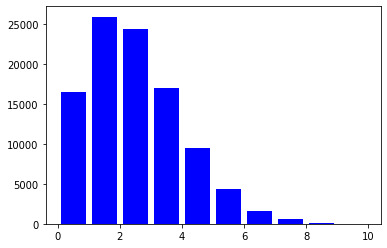

In [55]:
a = sampling(0.1) < optimum.x
_input = a.sum(axis = 1)
plt.hist(_input, rwidth = 0.8, color = 'blue')

## (3)

In [77]:
for corr in np.arange(-0.1, 1, 0.1):
    res = str(round(((sampling(corr) < optimum.x).sum(axis = 1) > 0).sum()/1000, 2))+'%'
    print("{} : {}".format(round(corr, 1), res))

-0.1 : 95.36%
0.0 : 89.42%
0.1 : 83.62%
0.2 : 77.95%
0.3 : 72.59%
0.4 : 67.03%
0.5 : 61.59%
0.6 : 55.94%
0.7 : 50.0%
0.8 : 43.41%
0.9 : 35.7%
